<div style="display: flex; background-color: RGB(255,114,0);" >

# PROJET - Cat or Dog
</div>

<div style="display: flex; background-color: blue;" >

# 1.Contexte du projet
</div>

Dans ce projet, vous apprendrez les bases des CNN, leur structure, leurs composants et leur fonctionnement, et vous apprendrez pratiquement comment résoudre une tâche d'apprentissage en profondeur de classification d'images, former , et testez un réseau de neurones avec Tensorflow à l'aide d'images.

- Mettez en place un système de veille
- Import the Dataset and Preprocess the Data
- Create and Train the Model
- Test the Model and Make Predictions

|       |                       |
|-------|-----------------------|
| Jalon | Date limite 07/08/2022|
| Critères de performance | À la fin de ce projet, vous aurez créé un réseau de neurones profonds avec TensorFlow sur un ensemble de données.|
|Livrables|Une présentation type "Powerpoint", faisant office de veille et Jupyter Notebooks : classification|

### Livrables

Une présentation type "Powerpoint", faisant office de veille.

Quelques questions de veille 
- C'est quoi le Deep Learning 
- Présenter la librairie Tensorflow ...
- Qu'est-ce qu'un CNN (l'avantage, l'inconvénient, domaine d'application), est-ce qu'il y a d'algorithmes plus puissants que CNN 
- Décrire notamment comment construire un CNN et l'utilité de chaque étape 
(sinon vous pouvez représenter d'autres axes qui vous sembler intéressant à savoir avant de commencer un projet sur le Deep Learning)


Jupyter Notebooks : classification

### Ressources
- train set : https://drive.google.com/drive/folders/1LLBvdZH07dtugxxHDvqArGp9lR7pQZgP?usp=sharing
- validation set : https://drive.google.com/drive/folders/1IoUkz-y_42xv_GzmHTMfb0hdVk-rrWWK?usp=sharing
- cats-train : https://drive.google.com/drive/folders/1xODwWAdtDLPVftnG8wM41sTQxgAbg81G?usp=sharing
- Your First Deep Learning with Keras Step-By-Step : https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/ 
- Mettez en place un système de veille : https://openclassrooms.com/fr/courses/4805776-mettez-en-place-un-systeme-de-veille-informationnelle

<div style="display: flex; background-color: Green; padding: 7px;" >

### 1.2. Mes ressources
</div>

- https://github.com/tensorflow/datasets/blob/master/tensorflow_datasets/image_classification/cats_vs_dogs.py
- https://www.tensorflow.org/datasets/catalog/cats_vs_dogs
- https://www.kaggle.com/c/dogs-vs-cats/data
- https://data-flair.training/blogs/cats-dogs-classification-deep-learning-project-beginners/
- https://www.kaggle.com/competitions/dogs-vs-cats/overview

- https://keras.io/examples/vision/image_classification_from_scratch/
- https://keras.io/api/applications/#usage-examples-for-image-classification-models

In [1]:
import matplotlib.pyplot as plt

from cat_or_dog_aurelie import *

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from os import getcwd
from os.path import exists, join

import cv2

In [2]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = 1

# Récupère le répertoire du programme
file_path = getcwd() + "\\"

print(f"Current execution path : {file_path}")

Current execution path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\


In [3]:
source_data_path = join(file_path,"dataset")
full_dataset_path = join(source_data_path, "full_dataset")
training_data_path = join(source_data_path, "new_training_set")
validation_data_path = join(source_data_path, "new_validation_set")
model_path = join(file_path, "model")
print("Source path :", source_data_path)
print("full dataset path :", full_dataset_path)
print("Training path :", training_data_path)
print("validation path :", validation_data_path)
print("model path :", model_path)

Source path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset
full dataset path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\full_dataset
Training path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\new_training_set
validation path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\new_validation_set
model path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\model


<div style="display: flex; background-color: blue;" >

# 2.Chargement des données
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.0. Analyse du dataset
</div>

<div style="display: flex; background-color: indigo;" >

#### 2.0.1. Dataset initial
</div>

Le dataset initial était constitué de `4 147 données` était réparties tel que :

- `1 029` cats pour le train soit `25%` du dataset complet
- `1 119` dogs pour le train soit `27%` du dataset complet
-  `  999` cats pour le test soit `24%` du dataset complet
- `1 000` dogs pour le test soit `24%` du dataset complet
----------------------------------------------
- `2 148` au total train soit `52%` du dataset complet
- `1 999` au total test soit `48%` du dataset complet

Suite aux premières exécutions et prédictions, j'ai décidé d'augmenté le nombre de données. J'ai récupéré des données depuis `Kaggle`, que j'ai également complétées avec des images personnelles.

Après cette augmentation des données, les données de validation ne représentaient que 3% des données totales :

`
Taux de train : 97 %
Taux de validation : 3 %
`

Je décide donc de regrouper toutes les données et d'utiliser le système classique de split pour avoir un ratio plus cohérent.
Je garde toutefois quelques images pour faire des prédictions.

<div style="display: flex; background-color: indigo;" >

#### 2.0.2. Nouveau Dataset
</div>

Afin d'avoir un dataset cohérent j'ai :
- Supprimé toutes les images corrompues : `4 084` images corrompues supprimées
- fait une analyse des images et identifié la taille maximale des images du plus gros dataset (`kaggle`) : `Dimension Max : 500 x 500 et Dimension Min : 33 x 50`
- redimmensionné les images dépassant cette taille `650 images redimmensionnées`
- regroupé toutes les images dans un dossier commun avec les sous dossier cat et dog
- récupéré la liste des images par dossier et utilisé la méthode split pour avoir un ratio cohérent entre les 2 catégories
- copier les images soit dans le répertoire train, soit dans le répertoire validation

J'ai donc obtenu un dataset final de `24 110` images, constitué tel que :
- `11 866` cats soit `49`% du dataset complet
- `12 244` dogs soit `51`% du dataset complet
----------------------------------------------
- `9 492` cats pour le train soit `39`% du dataset complet
- `9 795` dogs pour le train soit `41`% du dataset complet
- `2 373` cats pour le test soit `10`% du dataset complet
- `2 449` dogs pour le test soit `10`% du dataset complet
----------------------------------------------
- `19 287` au total pour le train soit `80`% du dataset complet
- `4 822` au total pour le test soit `20`% du dataset complet
----------------------------------------------
- `24 110` données totales

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.1. Nettoyage
</div>

<div style="display: flex; background-color: indigo;" >

#### 2.1.1. Suppression des images corrompues
</div>

``` Deleted 4 084 images. ```

Images supprimées du dataset au premier tour (aux prochaines exécutions, les chiffres devraient être à 0)

In [5]:
# Il faut supprimer les images qui ne sont pas compatibles
removed_files = del_corrupt_img(full_dataset_path, include_sub_dir=1, verbose=verbose)

Deleted 0 images.


<div style="display: flex; background-color: indigo;" >

#### 2.1.2. Répartition des données entre train et validation
</div>

In [6]:
random_state = 0 # on fixe le random_state pour avoir toujours le même résultat
init_dataset_split = not exists(training_data_path) and not exists(validation_data_path)
if init_dataset_split:
    split_dataset_and_move_it(source_path=full_dataset_path, training_path=training_data_path, validation_path=validation_data_path, validation_rate=0.2, random_state=random_state, verbose=verbose)
else:
    print("Le dataset train et test existe déjà")

Le dataset train et test existe déjà


Le dataset est prêt, le code de répartition ne sera pas exécuté si le dossier cible existe déjà.

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.2. Exploration
</div>

<div style="display: flex; background-color: indigo;" >

#### 2.2.1. Visualisation
</div>

In [7]:
imgs_train = get_dir_files(training_data_path, include_sub_dir=1, verbose=verbose)
imgs_train = sorted(imgs_train)
print(f"{len(imgs_train)} images d'entrainement.")

19287 images d'entrainement.


(-0.5, 499.5, 317.5, -0.5)

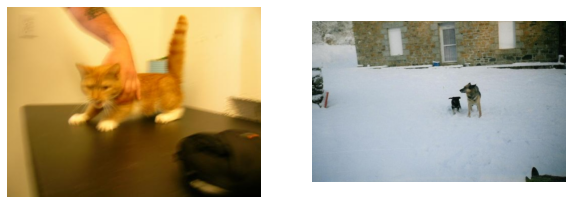

In [122]:
plt.figure(figsize=(10, 15))

plt.subplot(2, 2, 1)
imread = cv2.imread(join(training_data_path, imgs_train[0]))
dst = cv2.cvtColor(imread, code=cv2.COLOR_BGR2RGB)
plt.imshow(dst)
plt.axis("off")

plt.subplot(2, 2, 2)
imread = cv2.imread(join(training_data_path, imgs_train[-1]))
dst = cv2.cvtColor(imread, code=cv2.COLOR_BGR2RGB)
plt.imshow(dst)
plt.axis("off")

In [9]:
imgs_val = get_dir_files(validation_data_path, include_sub_dir=1, verbose=verbose)
imgs_val = sorted(imgs_val)
print(f"{len(imgs_val)} images de validation.")

4822 images de validation.


In [10]:
total_données = (len(imgs_val)+len(imgs_train))
print(f"Taux de train : {round(len(imgs_train)/total_données*100)} %")
print(f"Taux de validation : {round(len(imgs_val)/total_données*100)} %")

Taux de train : 80 %
Taux de validation : 20 %


<div style="display: flex; background-color: indigo;" >

#### 2.2.2. Uniformisation des tailles
</div>

A la première exécution :
- Dimension train : `Dimension Max : 500 x 500 et Dimension Min : 33 x 50`
- Dimension validation : `Dimension Max : 4000 x 4160 et Dimension Min : 50 x 50`

Les dimensions entre le train et la validation sont très différentes, nous allons donc commencer par retailler les images qui ont une taille supérieure au train.

`650 images redimmensionnées` => ces données ont ensuite été ajoutées au dataset global

Suite à la construction du nouveau dataset, toutes les tailles ont été uniformisées avant cette étapes.
Il ne devrait donc plus y avoir d'image retaillée.

In [11]:
nb_resized_picture = 0
image_Width_max = 500 # Information récupéré à la première exécution de la suite du traitement
image_Height_max = 500 # Information récupéré à la première exécution de la suite du traitement
for img_p in imgs_val:
    nb_resized_picture += resize_and_replace_picture(img_p, dim=(image_Width_max, image_Height_max), bigger_only=True, lower_only=False, verbose=verbose)
print(f"{nb_resized_picture} images redimmensionnées.")

0 images redimmensionnées.


<div style="display: flex; background-color: indigo;" >

#### 2.2.2. Création d'une DF pour exploration
</div>

In [12]:
df_train = get_df_image(imgs_train, training_data_path, verbose=verbose)
df_train.head()

,file_name,file_type,category_name,img_height,img_width,img_dim
0,c:\Users\User\WORK\workspace-ia\PROJETS\projet...,jpg,cat,500,375,3
1,c:\Users\User\WORK\workspace-ia\PROJETS\projet...,jpg,cat,320,426,3
2,c:\Users\User\WORK\workspace-ia\PROJETS\projet...,jpg,cat,226,175,3
3,c:\Users\User\WORK\workspace-ia\PROJETS\projet...,jpg,cat,150,150,3
4,c:\Users\User\WORK\workspace-ia\PROJETS\projet...,jpg,cat,500,375,3


In [13]:
image_Width_max=df_train['img_width'].max()
image_Height_max=df_train['img_height'].max()
image_Width_min=df_train['img_width'].min()
image_Height_min=df_train['img_height'].min()
print(f"Dimension Max : {image_Width_max} x {image_Height_max}")
print(f"Dimension Min : {image_Width_min} x {image_Height_min}")

Dimension Max : 649 x 850
Dimension Min : 33 x 50


Comme les données ont été augmentées, il a fallu revoir les données de validation, puisque les ancienne était déjà dans le train.
Il faut donc vérifier que les données de validation sont cohérentes avec les données de train.

In [14]:
df_test = get_df_image(imgs_val, validation_data_path, verbose=verbose)
df_test.head()

,file_name,file_type,category_name,img_height,img_width,img_dim
0,c:\Users\User\WORK\workspace-ia\PROJETS\projet...,jpg,cat,500,375,3
1,c:\Users\User\WORK\workspace-ia\PROJETS\projet...,jpg,cat,336,500,3
2,c:\Users\User\WORK\workspace-ia\PROJETS\projet...,jpg,cat,373,500,3
3,c:\Users\User\WORK\workspace-ia\PROJETS\projet...,jpg,cat,180,198,3
4,c:\Users\User\WORK\workspace-ia\PROJETS\projet...,jpg,cat,386,500,3


In [15]:
image_test_Width_max=df_test['img_width'].max()
image_test_Height_max=df_test['img_height'].max()
image_test_Width_min=df_test['img_width'].min()
image_test_Height_min=df_test['img_height'].min()
print(f"Dimension Max : {image_test_Width_max} x {image_test_Height_max}")
print(f"Dimension Min : {image_test_Width_min} x {image_test_Height_min}")

Dimension Max : 649 x 1006
Dimension Min : 37 x 50


<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.3. Chargement des données
</div>

<div style="display: flex; background-color: indigo;" >

#### 2.1.2. Chargement et standardisation des données
</div>

La taille la plus petite, est trop petite (après avoir essayé avec les valeurs `(64,64)` et `(50,50)`, il faut donc identifier une taille "raisonnable".

In [16]:
# Taille des images
target_size=(180,180)
# Pour le traitement par lot des images (optimisation de la decente de gradient)
batch_size = 32 
# 2 Classes possible uniquement, pourquoi pas 'categorical' ?
class_mode='binary'
# standardisation des données des images
rescale=1./255 

<div style="display: flex; background-color: indigo;" >

#### 2.1.3. Augmentation des données
</div>

Augmentation des images à la volée via les générateurs pour permettre de simuler une augmentation du nombre de données disponible pour l'entrainement du réseau.

La classe de Keras ImageDataGenerator permet l'application de filtres et de transformations sur les images sources.

C'est ce qui a été appliqué lors du chargement des données.

In [17]:
# train_datgen=ImageDataGenerator(rescale=rescale, shear_range=0.2,zoom_range=0.2, horizontal_flip=True)
train_datgen=ImageDataGenerator(
            rescale=rescale,
            shear_range=0.1,
            zoom_range=0.3,
            rotation_range=10,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=True,
            )

<div style="display: flex; background-color: indigo;" >

#### 2.1.4. Chargement des données
</div>

In [18]:
training_set=train_datgen.flow_from_directory(training_data_path,     target_size=target_size,batch_size=batch_size,class_mode=class_mode)
validation_set=train_datgen.flow_from_directory(validation_data_path, target_size=target_size,batch_size=batch_size,class_mode=class_mode)

Found 19287 images belonging to 2 classes.
Found 4822 images belonging to 2 classes.


In [19]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    training_data_path,
    seed=1337,
    image_size=target_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    validation_data_path,
    seed=1337,
    image_size=target_size,
    batch_size=batch_size,
)

Found 19287 files belonging to 2 classes.
Found 4822 files belonging to 2 classes.


<div style="display: flex; background-color: indigo;" >

#### 2.1.5. Répartition entre les classes
</div>

In [20]:
from sklearn.utils import class_weight as cw

In [21]:
# Cette fonction permet de retourner le ratio entre chat vs chien (utile dans le cas ou une classe et proéminente sur les autres)
def get_weight(y):
    class_weight_current =  cw.compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
    return class_weight_current

In [22]:
class_weights = get_weight(training_set.classes)
class_weights

array([1.01596081, 0.98453292])

On voit que l'apprentissage est plutôt équilibré

<div style="display: flex; background-color: indigo;" >

#### 2.1.5. Identification des labels
</div>

In [23]:
label_codes=training_set.class_indices
print(label_codes)
labels = list(label_codes.keys())
labels_reverse = dict((v,k) for k,v in label_codes.items())
print(labels_reverse)
labels

{'cat': 0, 'dog': 1}
{0: 'cat', 1: 'dog'}


['cat', 'dog']

In [24]:
imgs_train_y = []

for f in imgs_train:
    category=f.split('\\')[-1]
    category=category.split('.')[0]
    imgs_train_y.append(label_codes.get(category,0))

imgs_val_y = []

for f in imgs_val:
    category=f.split('\\')[-1]
    category=category.split('.')[0]
    imgs_val_y.append(label_codes.get(category,0))

<div style="display: flex; background-color: indigo;" >

#### 2.1.6. Visualisation
</div>

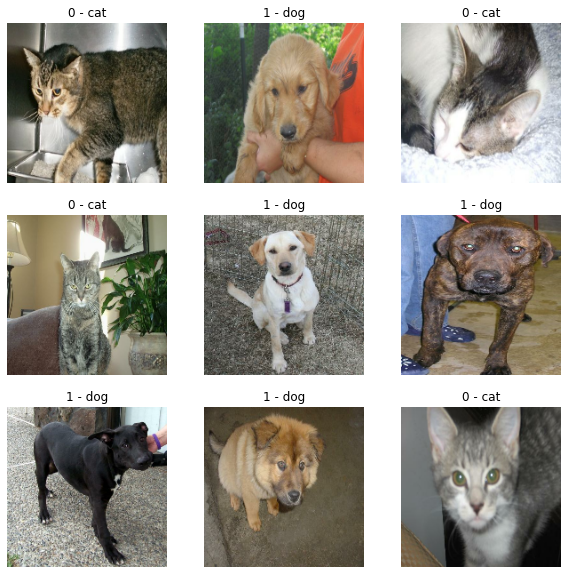

In [25]:
plt.figure(figsize=(10, 10))
for images, ds_labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        id = int((ds_labels[i]))
        plt.title(f"{id} - {labels[id]}")
        plt.axis("off")

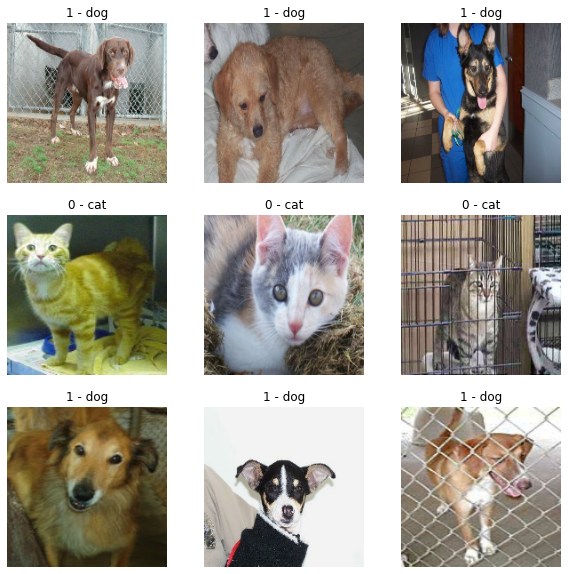

In [26]:
plt.figure(figsize=(10, 10))
for images, ds_labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        id = int((ds_labels[i]))
        plt.title(f"{id} - {labels[id]}")
        plt.axis("off")

<div style="display: flex; background-color: indigo;" >

#### 2.1.7. Images de tests
</div>

In [88]:
img_test_path=r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation\to_class'
img_tests, img_tests_y = get_validation_img(label_codes=label_codes, path=img_test_path, verbose=0)
img_test_cat = img_tests[0]
img_test_dog = img_tests[-1]

(-0.5, 3817.5, 2999.5, -0.5)

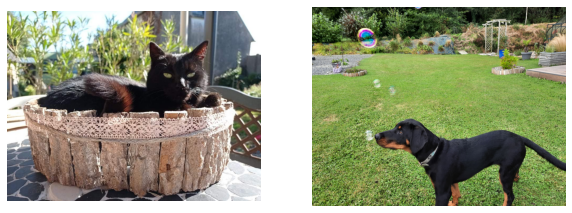

In [121]:
plt.figure(figsize=(10, 15))

plt.subplot(2, 2, 1)
imread = cv2.imread(join(img_test_path, img_test_cat))
dst = cv2.cvtColor(imread, code=cv2.COLOR_BGR2RGB)
plt.imshow(dst)
plt.axis("off")

plt.subplot(2, 2, 2)
imread = cv2.imread(join(img_test_path, img_test_dog))
dst = cv2.cvtColor(imread, code=cv2.COLOR_BGR2RGB)
plt.imshow(dst)
plt.axis("off")

In [77]:
test_datagen = ImageDataGenerator(rescale=rescale)

In [78]:
img_test_path=r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation'
test_generator = test_datagen.flow_from_directory(
    img_test_path,
    target_size=target_size,
    class_mode=None,  # None pour le jeu de test
    seed=random_state,
    batch_size=1,     # batch_size = 1 sur le jeu de test
    shuffle=False     # Pas de mélange sur le jeu de test
)

Found 8 images belonging to 1 classes.


<div style="display: flex; background-color: blue;" >

# 3.Modélisation
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.1.Paramètres
</div>

In [31]:
epochs                  = 50   # Nombre d'epoch
stopping_patience       = 10   # Callback pour stopper si le modèle n'apprend plus
optimizer               = 'adam'

In [32]:
# Génération des STEPS_SIZE (comme nous utilisons des générateurs infinis)
STEP_SIZE_TRAIN = training_set.n // training_set.batch_size
STEP_SIZE_VALID = validation_set.n // validation_set.batch_size
STEP_SIZE_TEST  = test_generator.n  // test_generator.batch_size
print(STEP_SIZE_TRAIN, STEP_SIZE_VALID, STEP_SIZE_TEST)

602 150 13


<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.2.Callbacks Keras
</div>

Les callback permettent d'appliquer des traitements pendant l'entrainement du réseau. Nous pouvons donc influer ou observer l'apprentissage en cours.

Dans notre cas nous allons en définir trois : 
- un pour permettre l'arrêt prématuré de l'entrainement afin d'économiser les temps de calcul dans le cas ou le réseau ne progresse plus, et 
- le deuxième pour influer sur un paramètre appelé le Learning Rate utilisé dans les calculs numériques de la decente de gradient.
- un pour savegarder le meilleur modèle

In [33]:
# Import des librairies pour la gestion des Callback
from keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping

In [34]:
# Permet de stopper l'apprentissage si il stagne
EARLY_STOPPING = EarlyStopping(
                    monitor='val_loss',
                    patience=stopping_patience,
                    verbose=verbose,
                    mode='auto')

# Reduit le LearningRate si stagnation
LR_REDUCTION = ReduceLROnPlateau(
                monitor='val_acc',
                patience=5,
                verbose=verbose,
                factor=0.5,
                min_lr=0.00001)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.4.Modèle 4
</div>

Définissons l'architecture du CNN puis de sa couche de classification, comme nous ne prédisons que deux classes, la couche de sortie sera composée de deux neurones.

In [35]:
fit_ccn4 = False
model_cnn4_path = join(model_path, "cnn4.pkl")
model_cnn_4 = None

Entrainement du modèle.

`fit` : il est utilisé lorsque l'intégralité des données d'apprentissage peut tenir dans la mémoire et qu'aucune augmentation de données n'est appliquée.

`fit_generator` est utilisé lorsque nous avons un énorme ensemble de données à insérer dans notre mémoire ou lorsque l'augmentation des données doit être appliquée.

> `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators

Le modèle a été entrainé en `252m 35s` avec le résultat suivant :

`Epoch 50: val_loss did not improve from 0.58636`
`602/602 [==============================] - 303s 503ms/step - loss: 0.5994 - accuracy: 0.6779 - val_loss: 0.5892 - val_accuracy: 0.6810 - lr: 1.0000e-06`

La courbe d'apprentissage correspondante :

![courbe d'apprentissage](presentation/img/cnn4_modele_simple_courbe_apprentissage.png)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 16)        2320      
                                                                 
 batch_normalization_1 (Batc  (None, 90, 90, 16)       64        
 hNormalization)                                                 
                                                        

INFO:tensorflow:Assets written to: c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\model\cnn4.pkl\assets


INFO:tensorflow:Assets written to: c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\model\cnn4.pkl\assets


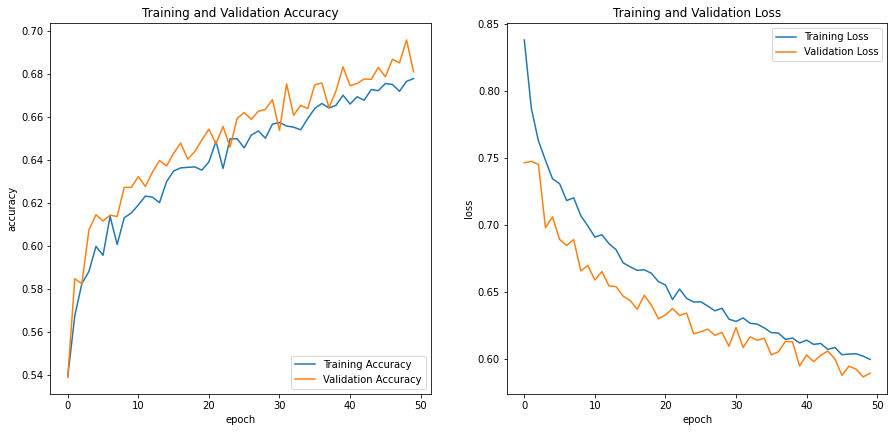

In [36]:
# On charge le modèle s'il existe, sinon on lance l'entrainement
if fit_ccn4 or not exists(model_cnn4_path):
        # @see : https://keras.io/api/callbacks/model_checkpoint/
        SAVE_BEST = keras.callbacks.ModelCheckpoint(
                filepath="model_check_point/cnn_v4_best.h5",
                save_best_only=True,
                verbose=verbose)

        CALLBACKS = [EARLY_STOPPING, LR_REDUCTION, SAVE_BEST]
        model_cnn_4 = make_model_cnn4(input_shape=[target_size[0],target_size[1],3], num_classes=len(labels), verbose=verbose)
        if verbose and model_cnn_4 is not None:
                print(model_cnn_4.summary())
                tf.keras.utils.plot_model(model_cnn_4, show_shapes=True)
        
        history_cnn4 = model_cnn_4.fit(
                training_set,           # le générateur pour les données d'entrainement
                steps_per_epoch=STEP_SIZE_TRAIN,     # le Step_size pour les données d'entrainement
                validation_data=validation_set,     # le générateur pour les données de validation
                validation_steps=STEP_SIZE_VALID,    # le Step_size pour les données de validation
                epochs=epochs,                       # le nombre d'epoch sur l'ensemble du jeu de données
                verbose=verbose,                     # la verbosité
                # class_weight=class_weights,          # le ratio de répartition des classes chien/chat
                callbacks=CALLBACKS)
        if model_path is not None:
                model_cnn_4.save(model_cnn4_path)
        show_learning_graph(history=history_cnn4, epochs=epochs, verbose=verbose)
elif exists(model_cnn4_path):
        model_cnn_4 = keras.models.load_model(model_cnn4_path)

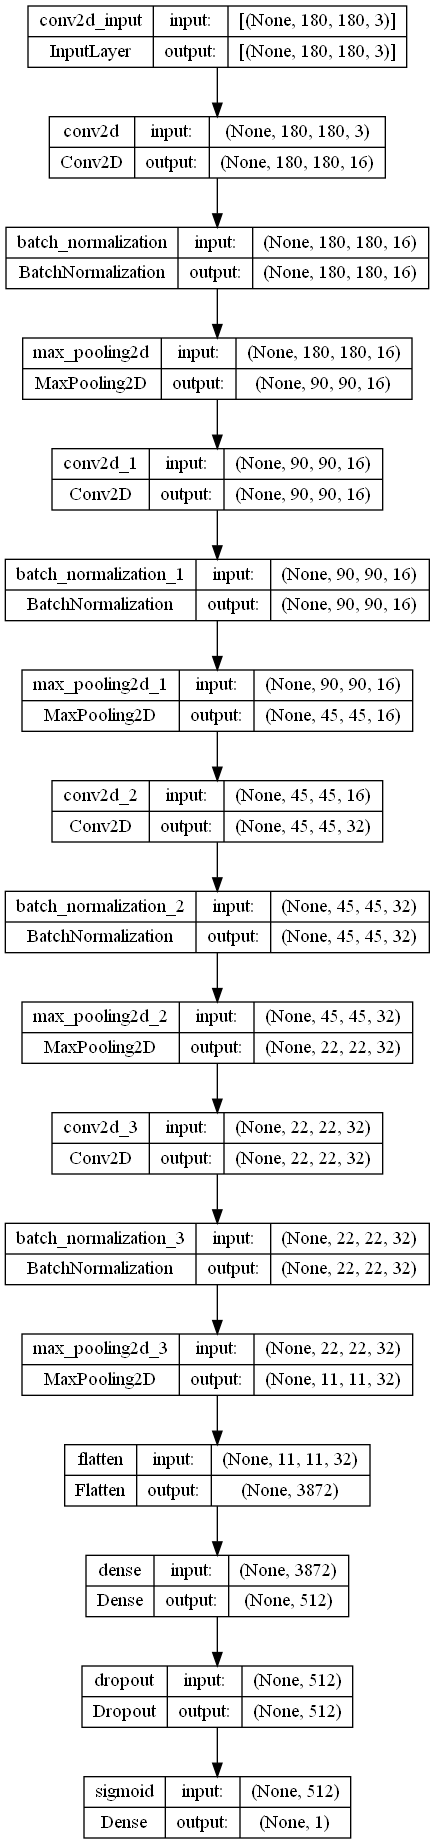

In [68]:
tf.keras.utils.plot_model(model_cnn_4, show_shapes=True)

Evaluation : 
`13/13 [==============================] - 3s 250ms/step - loss: 0.5527 - accuracy: 0.6995`

In [40]:
if model_cnn_4 is not None:
    model_cnn_4.evaluate(validation_set, steps=STEP_SIZE_TEST)

13/13 [==============================] - 3s 250ms/step - loss: 0.5527 - accuracy: 0.6995


<div style="display: flex; background-color: indigo;" >

#### 3.4.1 Prédiction
</div>

151/151 [==============================] - 43s 286ms/step
      cat   dog
cat  1278  1095
dog  1298  1151


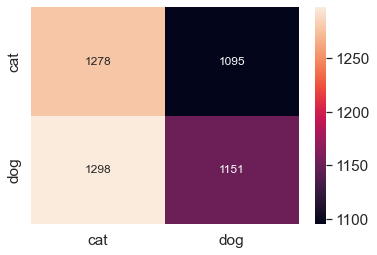

In [73]:
if model_cnn_4 is not None:
    # Le générateur doit être reseter avant utilisation pour les prédictions
    validation_set.reset()
    pred_sig=model_cnn_4.predict(validation_set, verbose=1)
    if verbose>1:
        # Visualisation du vecteur de probabilité des 5 premières lignes des prédictions
        print(pred_sig[0:5,:])
    
    predictions = [round(k[0]) for k in pred_sig]
    df_cm = confusion_matrix(imgs_val_y, predictions)
    # On ajoute les labels textuels pour cque ce soit plus lisible
    cm_array_df = pd.DataFrame(df_cm, index=labels, columns=labels)
    if verbose:
        print(cm_array_df)
        sn.set(font_scale=1.4) # for label size
        sn.heatmap(cm_array_df, annot=True, annot_kws={"size": 12},fmt='g')

8/8 [==============================] - 0s 62ms/step
     cat  dog
cat    0    4
dog    0    4


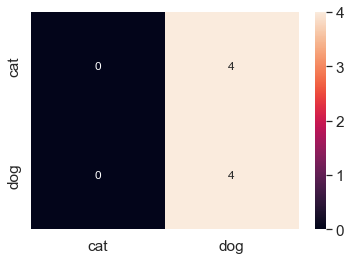

In [132]:
if model_cnn_4 is not None:
    # Le générateur doit être reseter avant utilisation pour les prédictions
    test_generator.reset()
    pred_sig=model_cnn_4.predict(test_generator, verbose=1)
    if verbose>1:
        # Visualisation du vecteur de probabilité des 5 premières lignes des prédictions
        print(pred_sig[0:5,:])
    
    predictions = [round(k[0]) for k in pred_sig]
    df_cm = confusion_matrix(img_tests_y, predictions)
    # On ajoute les labels textuels pour cque ce soit plus lisible
    cm_array_df = pd.DataFrame(df_cm, index=labels, columns=labels)
    if verbose:
        print(cm_array_df)
        sn.set(font_scale=1.4) # for label size
        sn.heatmap(cm_array_df, annot=True, annot_kws={"size": 12},fmt='g')

<div style="display: flex; background-color: indigo;" >

#### 3.4.2 Conclusion
</div>

Ce modèle a une accuracy de `0.6995` et l'on peut voir sur la matrice de confusion qu'il semble effectivement avoir beaucoup d'erreurs.

Avec les images de tests il prédit tout en chien, alors que d'autres modèles prédisaient tout en chat.

<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.5.Modèle 5
</div>

Définissons l'architecture du CNN puis de sa couche de classification, comme nous ne prédisons que deux classes, la couche de sortie sera composée de deux neurones.

In [ ]:
fit_ccn5 = False
model_cnn5_path = join(model_path, "cnn5.pkl")
model_cnn5_path_best = join(model_path, "cnn5_best.h5")
model_cnn_5 = None

In [ ]:
# On charge le modèle s'il existe, sinon on lance l'entrainement
if fit_ccn5 or not exists(model_cnn5_path):
        # @see : https://keras.io/api/callbacks/model_checkpoint/
        SAVE_BEST = keras.callbacks.ModelCheckpoint(
                filepath=model_cnn5_path_best,
                save_best_only=True,
                verbose=verbose)

        CALLBACKS = [EARLY_STOPPING, LR_REDUCTION, SAVE_BEST]
        model_cnn_5 = make_model_cnn4(input_shape=[target_size[0],target_size[1],3], num_classes=len(labels), verbose=verbose)
        if verbose and model_cnn_5 is not None:
                print(model_cnn_5.summary())
                tf.keras.utils.plot_model(model_cnn_5, show_shapes=True)
        
        history_cnn5 = model_cnn_5.fit(
                training_set,           # le générateur pour les données d'entrainement
                steps_per_epoch=STEP_SIZE_TRAIN,     # le Step_size pour les données d'entrainement
                validation_data=validation_set,     # le générateur pour les données de validation
                validation_steps=STEP_SIZE_VALID,    # le Step_size pour les données de validation
                epochs=epochs,                       # le nombre d'epoch sur l'ensemble du jeu de données
                verbose=verbose,                     # la verbosité
                callbacks=CALLBACKS)
        if model_path is not None:
                model_cnn_5.save(model_cnn5_path)
        show_learning_graph(history=history_cnn5, epochs=epochs, verbose=verbose)
elif exists(model_cnn5_path):
        model_cnn_5 = keras.models.load_model(model_cnn5_path)
elif exists(model_cnn5_path_best):
        model_cnn_5 = keras.models.load_model(model_cnn5_path_best)

In [ ]:
if model_cnn_5 is not None:
    model_cnn_5.evaluate(validation_set, steps=STEP_SIZE_TEST)

<div style="display: flex; background-color: indigo;" >

#### 3.5.1. Prédiction
</div>

151/151 [==============================] - 43s 286ms/step
      cat   dog
cat  1278  1095
dog  1298  1151


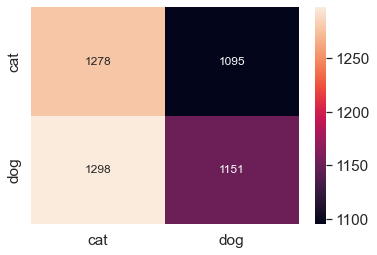

In [ ]:
if model_cnn_5 is not None:
    # Le générateur doit être reseter avant utilisation pour les prédictions
    validation_set.reset()
    pred_sig=model_cnn_5.predict(validation_set, verbose=1)
    if verbose>1:
        # Visualisation du vecteur de probabilité des 5 premières lignes des prédictions
        print(pred_sig[0:5,:])
    
    predictions = [round(k[0]) for k in pred_sig]
    df_cm = confusion_matrix(imgs_val_y, predictions)
    # On ajoute les labels textuels pour cque ce soit plus lisible
    cm_array_df = pd.DataFrame(df_cm, index=labels, columns=labels)
    if verbose:
        print(cm_array_df)
        sn.set(font_scale=1.4) # for label size
        sn.heatmap(cm_array_df, annot=True, annot_kws={"size": 12},fmt='g')

8/8 [==============================] - 0s 62ms/step
     cat  dog
cat    0    4
dog    0    4


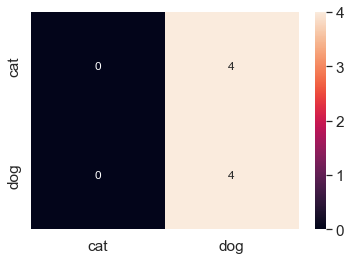

In [ ]:
if model_cnn_5 is not None:
    # Le générateur doit être reseter avant utilisation pour les prédictions
    test_generator.reset()
    pred_sig=model_cnn_5.predict(test_generator, verbose=1)
    if verbose>1:
        # Visualisation du vecteur de probabilité des 5 premières lignes des prédictions
        print(pred_sig[0:5,:])
    
    predictions = [round(k[0]) for k in pred_sig]
    df_cm = confusion_matrix(img_tests_y, predictions)
    # On ajoute les labels textuels pour cque ce soit plus lisible
    cm_array_df = pd.DataFrame(df_cm, index=labels, columns=labels)
    if verbose:
        print(cm_array_df)
        sn.set(font_scale=1.4) # for label size
        sn.heatmap(cm_array_df, annot=True, annot_kws={"size": 12},fmt='g')

<div style="display: flex; background-color: indigo;" >

#### 3.5.2 Conclusion
</div>



<div style="display: flex; background-color: blue;" >

# ANNEXE
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.Modèle simple - CNN1
</div>

<div style="display: flex; background-color: indigo;" >

#### 3.1. Création du réseau de neurones
</div>

Résultats pour ce modèle : 

| Epoch | Train cat          | Train dog         | Res |
|-------|--------------------|-------------------|-----|
| 50/50 | 1 029              | 1 119             |`68/68 [==============================] - 11s 168ms/step - loss: 0.6710 - accuracy: 0.5945 - val_loss: 0.6762 - val_accuracy: 0.5780`|
| 50/50 | 1 029 + 12 500     | 1 119 + 12 500    |`800/800 [==============================] - 70s 88ms/step - loss: 0.6185 - accuracy: 0.6745 - val_loss: 0.6189 - val_accuracy: 0.6740`|

Ajout de 12 500 images par catégorie (source : PetImages), après suppression des images corrompues :

```
Training : Found 25570 images belonging to 2 classes.
Validation : Found 2000 images belonging to 2 classes.
```

Les essais de ce modèle n'ont pas été concluant, malgré l'augmentation des données d'apprentissage et une courbe d'appprentissage prometteuse :

![Courbe d'apprentissage](presentation/img/cnn1_modele_simple_courbe_apprentissage.png)

Les différentes prédictions effectuées étaient en erreur sur les chats.

![Matrice confusion](presentation/img/cnn1_modele_simple_matrice_confusion.png)

Ce modèle n'est donc pas adapté ou il faut travailler sur l'optimisation des paramètres.

In [86]:
# Pour exécuter le code, passer le paramètre fit_ccn1 à True.
# Par défaut il est à False pour ne pas l'exécuter à chaque fois.
fit_ccn1 = False
model_cnn1_name = join(model_path, "cnn_v1.h5")
model_cnn1_name_best = join(model_path, "cnn_v1_best.h5")
cnn = None

if fit_ccn1 or (not exists(model_cnn1_name) and not exists(model_cnn1_name_best)):
    cnn = create_and_fit_cnn1(target_size=target_size, training_set=training_set,validation_set=validation_set, epochs=50, model_path=model_cnn1_name_best,verbose=verbose)  
elif exists(model_cnn1_name):
    cnn = keras.models.load_model(model_cnn1_name)
elif exists(model_cnn1_name_best):
    cnn = keras.models.load_model(model_cnn1_name_best)

if verbose and cnn is not None:
    print(cnn.summary())
    tf.keras.utils.plot_model(cnn, show_shapes=True)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 180, 180, 3)  0           ['input_1[0][0]']                
                                                                                                  
 rescaling (Rescaling)          (None, 180, 180, 3)  0           ['sequential[0][0]']             
                                                                                                  
 conv2d (Conv2D)                (None, 90, 90, 32)   896         ['rescaling[0][0]']          

<div style="display: flex; background-color: indigo;" >

#### 3.2. Prédiction
</div>

In [93]:
if cnn is not None:
    found, predict_class = predict_img(model=cnn,img_test=join(img_test_path,img_test_cat), target_size=target_size, labels=labels,label_expected="cat",verbose=verbose)
    print(f"Expected : cat, predict : {labels[predict_class]}")
    found, predict_class = predict_img(model=cnn,img_test=join(img_test_path,img_test_dog), target_size=target_size, labels=labels,label_expected="dog",verbose=verbose)
    print(f"Expected : dog, predict : {labels[predict_class]}")

1/1 [==============================] - 0s 54ms/step
Expected : cat, predict : cat
1/1 [==============================] - 0s 52ms/step
Expected : dog, predict : dog


In [99]:
img_tests

['cat.001 (1).jpeg',
 'cat.001 (17).jpg',
 'cat.1 (1093).jpg',
 'cat.1 (1289).jpg',
 'dog.2 (1930).jpg',
 'dog.2 (1971).jpg',
 'dog.2 (2312).jpg',
 'dog.2 (2977).jpg']

In [100]:
img_tests_temp = []
for img in img_tests:
    img_tests_temp.append(join(img_test_path,img))

1/1 [==============================] - 0s 49ms/step


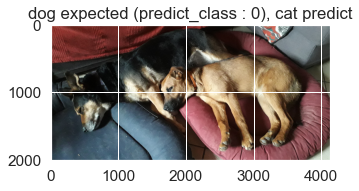

1/1 [==============================] - 0s 48ms/step


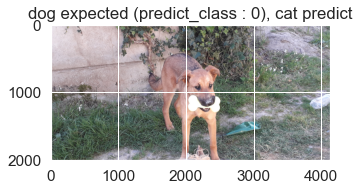

1/1 [==============================] - 0s 47ms/step


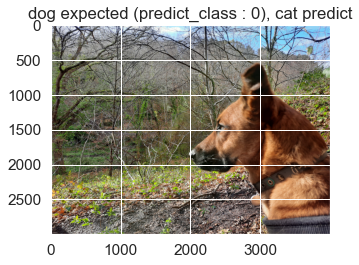

1/1 [==============================] - 0s 51ms/step
     cat  dog
cat    4    0
dog    3    1


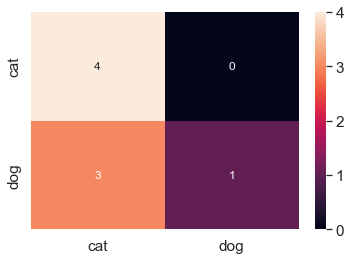

In [124]:
if cnn is not None:
    df_cm, fail_files = predict_n_img(cnn, img_tests_temp, img_tests_y,target_size, labels, verbose=verbose)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 4.Modèle pré-entrainés
</div>

https://keras.io/api/applications/#usage-examples-for-image-classification-models

Résultats des tests : (cf. notebook excluded model)

|Model   | Commentaires                                                                                                       |
|--------|--------------------------------------------------------------------------------------------------------------------|
|ResNet50| Toutes les images testées ont été classifiées en : `Predicted: [('n02102318', 'cocker_spaniel', 0.07705149), ('n02106550', 'Rottweiler', 0.07325226), ('n02102480', 'Sussex_spaniel', 0.07100144)]`, même les images de chat|
| VGG16  | Permet d'extraire des features|
| VGG19  | Permet d'extraire des features|
| InceptionV3 | Résultat avec 50 Epoch : `800/800 [==============================] - 60s 75ms/step - loss: nan - accuracy: 0.4997 - val_loss: nan - val_accuracy: 0.5000`|


<div style="display: flex; background-color: indigo;" >

#### 4.2. ResNet50
</div> 

Toutes les images testées ont été classifiées en : 

`Predicted: [('n02102318', 'cocker_spaniel', 0.07705149), ('n02106550', 'Rottweiler', 0.07325226), ('n02102480', 'Sussex_spaniel', 0.07100144)]`

même les images de chat. Ce modèle n'est donc pas adapté tel quel.

<div style="display: flex; background-color: indigo;" >

#### 4.3. VGG*
</div>

VGG16 et VGG19 permettent d'extraire des features, qui doivent certainement être utilisées par ailleurs. ?

<div style="display: flex; background-color: indigo;" >

#### 4.4. InceptionV3
</div>

1. Récupération du modèle
1. Customisation du modèle
1. Compilation et apprentissage sur les données du projet
1. Résultat avec 50 Epoch : `800/800 [==============================] - 60s 75ms/step - loss: nan - accuracy: 0.4997 - val_loss: nan - val_accuracy: 0.5000`

Ce modèle ne semble pas adapté à notre besoin, de plus il est beaucoup trop complexe.

<div style="display: flex; background-color: Green; padding: 7px;" >

### 5.Nouveau modèle : CNN2
</div>

<div style="display: flex; background-color: indigo;" >

#### 5.1.Création du modèle
</div> 

Représentation du modèle :

![Représentation du modèle](presentation/img/cnn2_model_graph_du_modele.png)


`Epoch 25/50`

`800/800 [==============================] - 264s 330ms/step - loss: 0.5798 - accuracy: 0.6946 - val_loss: 0.5567 - val_accuracy: 0.7170`

Exécution 2 :

`Epoch 35/50`
`603/603 [==============================] - ETA: 0s - loss: 0.6414 - accuracy: 0.6273`
`Epoch 35: val_loss improved from 0.61208 to 0.60733, saving model to model_check_point\cnn_v2_best.h5`

`Epoch 37: val_loss did not improve from 0.60733`
`603/603 [==============================] - 1395s 2s/step - loss: 0.6325 - accuracy: 0.6427 - val_loss: 0.6090 - val_accuracy: 0.6624`

Arrêt manuel du traitement après 850 min et 2.9s d'exécution, soit 14.17 heures d'exécution ce qui semble beaucoup trop long pour cet exercice. De fait je ne dispose pas de la courbe d'apprentissage.

In [67]:
print(f"{round(850/60,2)} heures d'exécution")

14.17 heures d'exécution


In [127]:
# Pour exécuter le code, passer le paramètre fit_cnn2 à True.
# Par défaut il est à False pour ne pas l'exécuter à chaque fois.
fit_cnn2 = False
model_cnn2_name = join(model_path, "cnn2.pkl")
model_cnn2_name_best = join(model_path, "cnn_v2_best.h5")
model_cnn_2 = None
epochs = 50
target_size = (180, 180)

if fit_cnn2 or (not exists(model_cnn2_name) and not exists(model_cnn2_name_best)):

    # Création du modèle
    model_cnn_2 = make_model_cnn2(input_shape=target_size + (3,), num_classes=2, data_augmentation=False, sizes=[128, 256, 512])
    # Compilation du modèle
    model_cnn_2.compile(optimizer = Adam(learning_rate=0.000001) , loss = 'binary_crossentropy' , metrics = ['accuracy'])

    # @see : https://keras.io/api/callbacks/model_checkpoint/
    callbacks = [
        keras.callbacks.ModelCheckpoint(
            filepath="model_check_point/cnn_v2_best.h5",
            save_best_only=True,
            verbose=verbose,
            )
    ]
    # Entrainement du modèle
    history_cnn2 = model_cnn_2.fit(training_set, epochs = epochs , validation_data=validation_set, callbacks=callbacks)
    model_cnn_2.save(join(model_path, model_cnn2_name))

    # Evaluation du modèle
    show_learning_graph(history=history_cnn2, epochs=epochs, verbose=verbose)
elif exists(model_cnn2_name):
    model_cnn_2 = keras.models.load_model(model_cnn2_name)
elif exists(model_cnn2_name_best):
    model_cnn_2 = keras.models.load_model(model_cnn2_name_best)
if verbose and model_cnn_2 is not None:
    print(model_cnn_2.summary())
    tf.keras.utils.plot_model(model_cnn_2, show_shapes=True)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 180, 180, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 90, 90, 32)   896         ['rescaling[0][0]']              
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 90, 90, 32)  128         ['conv2d_4[0][0]']           

<div style="display: flex; background-color: indigo;" >

#### 5.2. Prédiction
</div>

1/1 [==============================] - 0s 47ms/step
Expected : cat, predict : cat
1/1 [==============================] - 0s 41ms/step


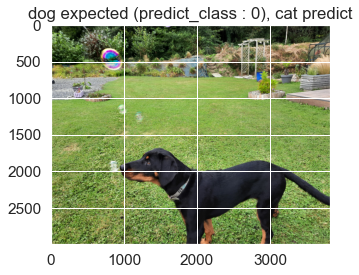

Expected : dog, predict : cat


In [130]:
if model_cnn_2 is not None:
    found, predict_class = predict_img(model=model_cnn_2,img_test=join(img_test_path, img_test_cat), target_size=target_size, labels=labels,label_expected="cat",verbose=verbose)
    print(f"Expected : cat, predict : {labels[predict_class]}")
    found, predict_class = predict_img(model=model_cnn_2,img_test=join(img_test_path, img_test_dog), target_size=target_size, labels=labels,label_expected="dog",verbose=verbose)
    print(f"Expected : dog, predict : {labels[predict_class]}")

1/1 [==============================] - 0s 39ms/step


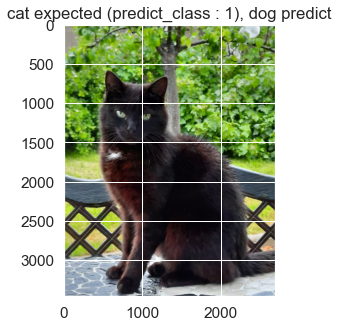

1/1 [==============================] - 0s 40ms/step


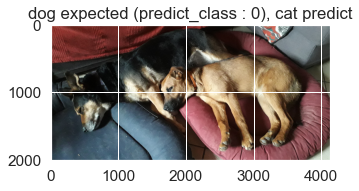

1/1 [==============================] - 0s 41ms/step


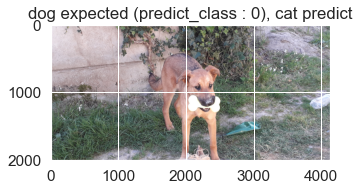

1/1 [==============================] - 0s 37ms/step


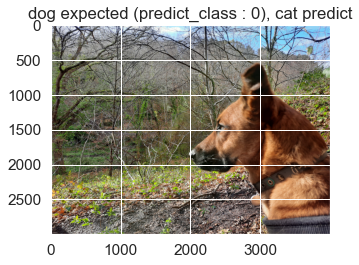

1/1 [==============================] - 0s 40ms/step


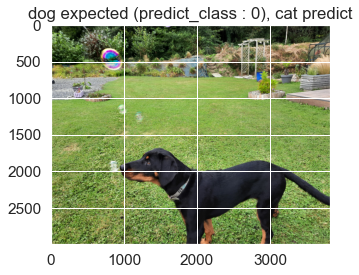

     cat  dog
cat    3    1
dog    4    0


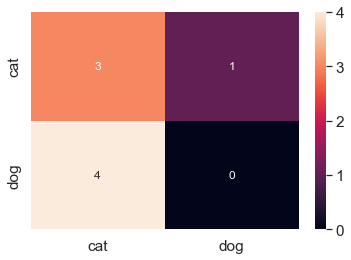

In [131]:
if model_cnn_2 is not None:
    df_cm, fail_files = predict_n_img(model_cnn_2, img_tests_temp, img_tests_y,target_size, labels, verbose=verbose)

<div style="display: flex; background-color: indigo;" >

#### 5.3. Conclusion
</div>

Ce modèle semble prédire plus de chats que de chiens

<div style="display: flex; background-color: blue;" >

# 5. Essai d'optimisation
</div>

Traitements possibles pour améliorer les prédictions :
- Augmenter les données de train :
  - Niveau 1 => ajouter des données => FAIT
  - Niveau 2 => augmenter les données existantes (faire pivoter les images)
  - Essayer en noir et blanc ?

- Traiter les images :
  - Augmenter la taille des images (rezise)
  - Enlever les flous
  - Equalizer les images
  
- Utiliser les CIF :
  - Identifier les descripteurs
  - traiter les descripteurs et non les pixels, 

- Modèles :
  - Améliorer les paramètres
  - Augmenter les couches

<div style="display: flex; background-color: Green; padding: 7px;" >

### 5.1. essai 1 : taille des images
</div>

In [ ]:
target_size_optimised=(180,180) # la taille de la plus petite image
batch_size_optimised = 32
class_mode='binary'
rescale=1./255 # standardisation des données des images

In [ ]:
train_datgen=ImageDataGenerator(rescale=rescale, shear_range=0.2,zoom_range=0.2, horizontal_flip=True)
training_set_up=train_datgen.flow_from_directory(training_data_path,     target_size=target_size_optimised,batch_size=batch_size_optimised,class_mode=class_mode)
validation_set_up=train_datgen.flow_from_directory(validation_data_path, target_size=target_size_optimised,batch_size=batch_size_optimised,class_mode=class_mode)

In [ ]:
model_cnn_3 = make_model(input_shape=target_size + (3,), num_classes=2, data_augmentation=False)
keras.utils.plot_model(model_cnn_3, show_shapes=True)

In [ ]:
opt = Adam(learning_rate=0.000001)
model_cnn_3.compile(optimizer = opt , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint("model_check_point/cnn_v3/save_at_{epoch}.h5"),
]

In [ ]:
epochs = 50
history_cnn3 = model_cnn_3.fit(training_set_up, epochs = epochs , validation_data=validation_set_up, callbacks=callbacks)

In [ ]:
show_learning_graph(history=history_cnn3, epochs=epochs, verbose=verbose)

In [ ]:
found, predict_class = predict_img(model=model_cnn_3,img_test=img_test, target_size=target_size, labels=labels,label_expected="dog",verbose=verbose)

if found :
    print(f"Expected : dog, found : {labels[predict_class]}"
else:
    print(f"Expected : dog, not found : {labels[predict_class]}"

In [ ]:
aurelie_test, aurelie_y = get_aurelie_test()
df_cm, fail_files = predict_n_img(model_cnn_3, aurelie_test, aurelie_y,target_size, labels, verbose=verbose)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 5.2. essai 1 - data augmentation
</div>

A priori lorsqu'on dispose de peu de données il est recommandé d'appliquer ce traitement pour avoir différents points de vue d'une même image et donc avoir plus de données.

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

In [ ]:
model_cnn_4 = make_model(input_shape=target_size + (3,), num_classes=2, data_augmentation=data_augmentation)
keras.utils.plot_model(model_cnn_3, show_shapes=True)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint("model_check_point/cnn_v4/save_at_{epoch}.h5"),
]

In [ ]:
epochs = 50
history_cnn4 = model_cnn_4.fit(training_set_up, epochs = epochs , validation_data=validation_set_up, callbacks=callbacks)

In [ ]:
show_learning_graph(history=history_cnn4, epochs=epochs, verbose=verbose)

In [ ]:
found, predict_class = predict_img(model=model_cnn_4,img_test=img_test, target_size=target_size, labels=labels,label_expected="dog",verbose=verbose)

if found :
    print(f"Expected : dog, found : {labels[predict_class]}"
else:
    print(f"Expected : dog, not found : {labels[predict_class]}"

In [ ]:
aurelie_test, aurelie_y = get_aurelie_test()
df_cm, fail_files = predict_n_img(model_cnn_4, aurelie_test, aurelie_y,target_size, labels, verbose=verbose)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 5.3. Traiter les images avec les histogrammes
</div>

Enlever les fllous, uniformiser, ...

<div style="display: flex; background-color: Green; padding: 7px;" >

### 5.4. CIF
</div>

Identifier les descripteurs, les points clés pour simplifier, les traitements et au besoin ajouter des couches.